# Contents

01 Importing Libraries and Data

02 Data Privacy (PII)

03 Creating Regions Column

04 Create an exclusion flag for low-activity customers 

05 Creating Customer and Department Profiles

06 Comparing Customer Profiles with Regions and Departments

07 Exporting Final Dataframe

# 01 Importing Libraries and Data set

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path 
path = r'C:\Users\zunai\OneDrive\Documents\Data Analytics\Achievement 4\11-22 Instacart Basket Analysis'

In [3]:
# Importing final data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'full_instacart_data.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.shape

(32404859, 33)

# 02 Data privacy (PII)

#### Data set include the first name and surnames of customers which is personally identifiable information and therefore these columns should be dropped from the data set (after consulting with senior analyst)

In [6]:
# Checking data columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'price_range_loc', 'Busiest day', 'Busiest days',
       'Busiest_hours_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_days_since_prior_order', 'frequency_flag',
       'first_name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [7]:
df = df.drop(columns = ['first_name', 'surname'])

In [8]:
# Checking column were removed
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'price_range_loc', 'Busiest day', 'Busiest days',
       'Busiest_hours_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_days_since_prior_order', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income'],
      dtype='object')

# 03 Creating Regions Column

In [9]:
# Creating regions lists (info from - https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States)
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [10]:
# Creating region column 
df.loc[df['state'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(south), 'region'] = 'South'
df.loc[df['state'].isin(west), 'region'] = 'West'

In [11]:
# Checking length of new column
len(df['region'])

32404859

In [12]:
# Checking frequency
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

#### Determine whether there’s a difference in spending habits between the different U.S. regions

In [13]:
#Creating a crosstab (with values as percentage) to compare region and spending flag
crosstab = pd.crosstab(df['region'], df['spender_flag'], normalize = True, dropna = False)
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,0.004813,0.229637
Northeast,0.003340,0.173261
South,0.006471,0.326562
West,0.004948,0.250967


# 04 Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [14]:
# Creating exclusion flag column
df.loc[df['max_order'] <= 5, 'activity'] = 0
df.loc[df['max_order'] > 5, 'activity'] = 1

In [15]:
# Checking frequency of new column (activity)
df['activity'].value_counts(dropna = False)

1.0    30171424
0.0     2233435
Name: activity, dtype: int64

In [16]:
# Check column length
len(df['activity'])

32404859

In [17]:
# Creating a dataframe of customers with orders less than 5
df_low_activity = df[df['activity'] == 0]

In [19]:
# Checking low activity dataframe frequency
df_low_activity['activity'].value_counts(dropna = False)

0.0    2233435
Name: activity, dtype: int64

In [20]:
# Exporting low activity dataframe
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared data', 'low_activity.pkl'))

In [21]:
#Deleting low activity dataframe to reduce memory usage
del df_low_activity

In [22]:
# Creating data frame for active customers (customer with >5 orders)
df_active = df[df['activity'] == 1]

In [23]:
# Checking active dataframe
df_active.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,region,activity
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1.0
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1.0
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1.0
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1.0
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1.0


In [24]:
df_active.shape

(30171424, 33)

In [25]:
# Deleting original dataframe to reduce memory usage
del df

 # 05 Create a profiling variable based on age, income, number of dependents and certain goods in the “department_id” column and create appropriate visualisation to show the distribution of profiles with aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure


### Age Profile

In [26]:
# Creating age flag 
df_active.loc[df_active['age'] <= 25, 'age_group'] = 'Young adult'
df_active.loc[(df_active['age'] > 25) & (df_active['age'] < 65), 'age_group'] = 'Adult'
df_active.loc[df_active['age'] >= 65, 'age_group'] = 'Senior'

In [27]:
# Checking new age_group column
df_active['age_group'].value_counts(dropna = False)

Adult          18417604
Senior          7989725
Young adult     3764095
Name: age_group, dtype: int64

In [28]:
# Aggregating for age group usage frequency
df_active.groupby('age_group').agg({'median_days_since_prior_order':['mean', 'min', 'max']})

median_days_since_prior_order            
                                     mean  min    max
age_group                                            
Adult                           10.372057  0.0  999.0
Senior                          10.320178  0.0  999.0
Young adult                     10.319003  0.0  999.0

In [29]:
#Aggregating for age group expenditure
df_active.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Adult        11.882920  1.0  99999.0
Senior       11.683091  1.0  99999.0
Young adult  12.107390  1.0  99999.0

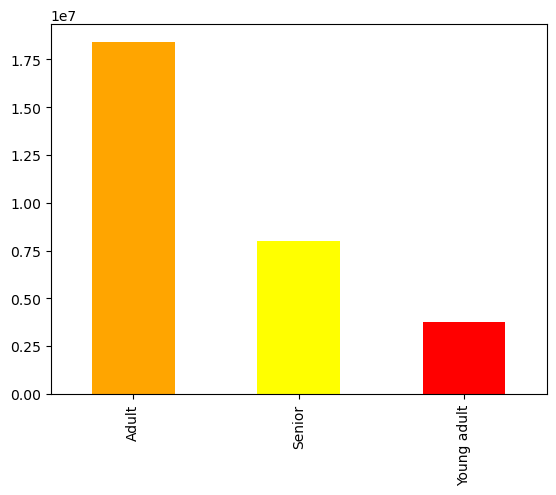

In [32]:
# Age frequency visualisation
bar_age = df_active['age_group'].value_counts().plot.bar(color = ['orange', 'yellow', 'red'])

In [33]:
# Exporting age bar chart
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_agegroup.png'))

### Income Profile

In [36]:
# Creating income flags
df_active.loc[df_active['income'] < 40000, 'income_group'] = 'Low income'
df_active.loc[(df_active['income'] >= 40000) & (df_active['income'] < 150000), 'income_group'] = 'Middle income'
df_active.loc[df_active['income'] > 150000, 'income_group'] = 'High income'

In [37]:
# Checking income group column
df_active['income_group'].value_counts()

Middle income    24813113
High income       3801883
Low income        1555737
Name: income_group, dtype: int64

In [38]:
# Aggregate for income usage frequency
df_active.groupby('income_group').agg({'median_days_since_prior_order':['mean', 'min', 'max']})

median_days_since_prior_order            
                                       mean  min    max
income_group                                           
High income                       10.238588  0.0  999.0
Low income                        11.039354  0.0  999.0
Middle income                     10.325944  0.0  999.0

In [39]:
# Aggregate for income group expenditure
df_active.groupby('income_group').agg({'prices':['mean', 'min', 'max']})

prices              
                    mean  min      max
income_group                          
High income    32.237740  1.0  99999.0
Low income      6.504810  1.0     25.0
Middle income   9.071169  1.0  99999.0

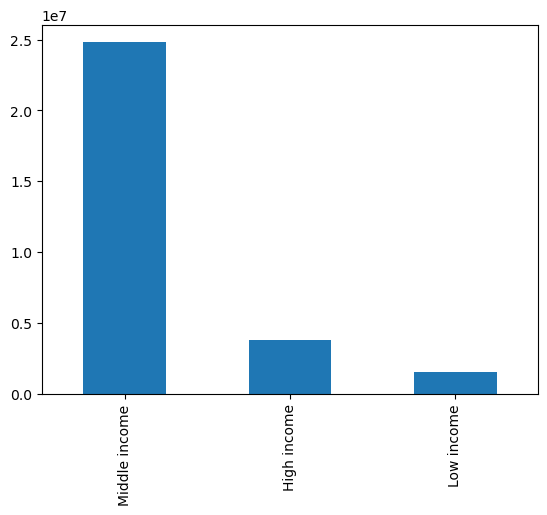

In [40]:
# Income group visualisation
bar_income = df_active['income_group'].sort_values().value_counts().plot.bar()

In [41]:
# Export income bar chart
bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_incomegroup.png'))

### Number of Dependents Profile

In [43]:
#Creating dependents flag
df_active.loc[df_active['no_of_dependants']>0, 'dependent_group']='has dependents'
df_active.loc[df_active['no_of_dependants']==0,'dependent_group']='no dependents'

In [44]:
# Check dependents group column
df_active['dependent_group'].value_counts()

has dependents    22632211
no dependents      7539213
Name: dependent_group, dtype: int64

In [45]:
# Aggregate for dependents group usuage frequency
df_active.groupby('dependent_group').agg({'median_days_since_prior_order':['mean', 'min', 'max']})

median_days_since_prior_order            
                                         mean  min    max
dependent_group                                          
has dependents                      10.358189  0.0  999.0
no dependents                       10.332220  0.0  999.0

In [46]:
# Aggregate for dependent group expenditure
df_active.groupby('dependent_group').agg({'prices':['mean', 'min', 'max']})

prices              
                      mean  min      max
dependent_group                         
has dependents   11.783410  1.0  99999.0
no dependents    12.081944  1.0  99999.0

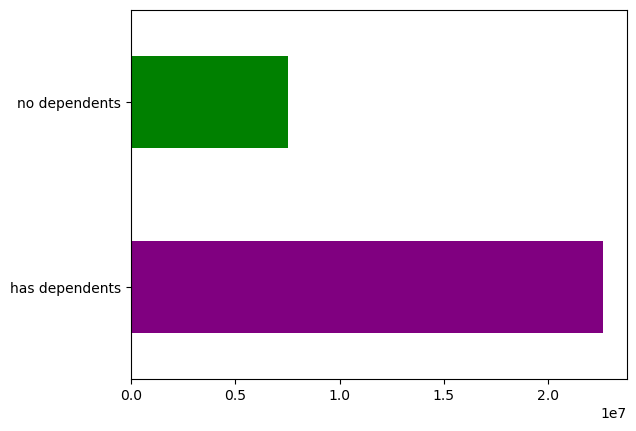

In [47]:
# Creating horizontal bar chart for dependent groups
bar_depend = df_active['dependent_group'].value_counts().plot.barh(color=['purple','green'])

## Creating Department Profiles

In [48]:
# Importing departments data set
df_dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [49]:
# Check departments dataframe
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [50]:
# Renaming unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [51]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [52]:
# Turning department dataframe into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)

In [53]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [54]:
#Mapping department names to department_id in dataframe
df_active['department'] = df_active['department_id'].map(data_dict)

In [55]:
# Checking dataframe for new department column
df_active.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,no_of_dependants,marital_status,income,region,activity,age_group,income_group,dependent_group,department
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,2/17/2019,3,married,40423,South,1.0,Adult,Middle income,has dependents,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,1.0,Adult,Middle income,has dependents,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,1.0,Adult,Middle income,has dependents,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,1.0,Adult,Middle income,has dependents,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,1.0,Adult,Middle income,has dependents,beverages


### We will create department profiles for the following departments; baby supplies, alcohol consumption and pet supplies.

### Baby Department Profile

In [56]:
# Creating baby department flag
df_active['baby_status'] = [1 if x == 'babies' else 0 for x in df_active['department']]
df_active['baby_status'] = df_active.groupby(['user_id'])['baby_status'].transform(np.max)

In [57]:
# Checking baby status column
df_active['baby_status'].value_counts(dropna = False)

0    20467796
1     9703628
Name: baby_status, dtype: int64

In [58]:
# Aggregating for baby staus usage frequency
df_active.groupby('baby_status').agg({'median_days_since_prior_order':['mean', 'min', 'max']})

median_days_since_prior_order            
                                     mean  min    max
baby_status                                          
0                               11.185426  0.0  999.0
1                                8.593128  0.0  999.0

In [59]:
# Aggregate for baby status expenditure
df_active.groupby('baby_status').agg({'prices':['mean', 'min', 'max']})

prices              
                  mean  min      max
baby_status                         
0            12.395094  1.0  99999.0
1            10.725133  1.0  99999.0

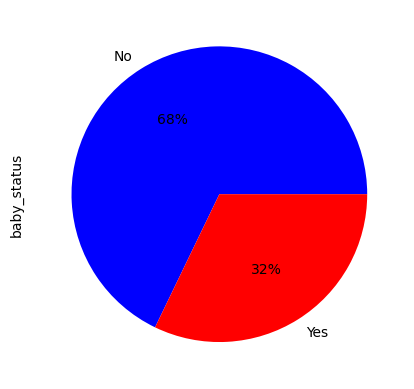

In [60]:
# Baby status visualisation
pie_baby = df_active['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['blue','red'])

In [61]:
# Exporting baby_status pie chart
pie_baby.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_babystatus.png'))

### Pet Department Profile

In [62]:
# Creating pet flag
df_active['pet_status'] = [1 if x == 'pets' else 0 for x in df_active['department']]
df_active['pet_status'] = df_active.groupby(['user_id'])['pet_status'].transform(np.max)

In [63]:
# Checking pet status column
df_active['pet_status'].value_counts(dropna = False)

0    26771440
1     3399984
Name: pet_status, dtype: int64

In [65]:
# Aggregating for pet status usage frequency
df_active.groupby('pet_status').agg({'median_days_since_prior_order':['mean', 'min', 'max']})

median_days_since_prior_order            
                                    mean  min    max
pet_status                                          
0                              10.448360  0.0  999.0
1                               9.590603  0.0  999.0

In [67]:
# Aggragating for pet status expenditure
df_active.groupby('pet_status').agg({'prices':['mean', 'min', 'max']})

prices              
                 mean  min      max
pet_status                         
0           11.574137  1.0  99999.0
1           14.093195  1.0  99999.0

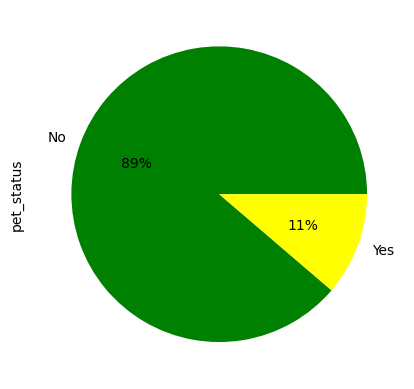

In [68]:
# Visualisation for pet status
pie_pet = df_active['pet_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['green','yellow'])

In [69]:
# Exporting pet_status pie chart
pie_pet.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_petstatus.png'))

### Alcohol Department Profile

In [70]:
# Creating Alcohol flags
df_active['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df_active['department']]
df_active['alcohol_status'] = df_active.groupby(['user_id'])['alcohol_status'].transform(np.max)

In [71]:
# Checking alcohol status column
df_active['alcohol_status'].value_counts(dropna=False)

0    27896871
1     2274553
Name: alcohol_status, dtype: int64

In [72]:
# Aggregating for alcohol usage frequency
df_active.groupby('alcohol_status').agg({'median_days_since_prior_order':['mean', 'min', 'max']})

median_days_since_prior_order            
                                        mean  min    max
alcohol_status                                          
0                                  10.360801  0.0  999.0
1                                  10.240074  0.0  999.0

In [73]:
# Aggregating by alcohol expenditure
df_active.groupby('alcohol_status').agg({'prices':['mean', 'min', 'max']})

prices              
                     mean  min      max
alcohol_status                         
0               10.882023  1.0  99999.0
1               23.828226  1.0  99999.0

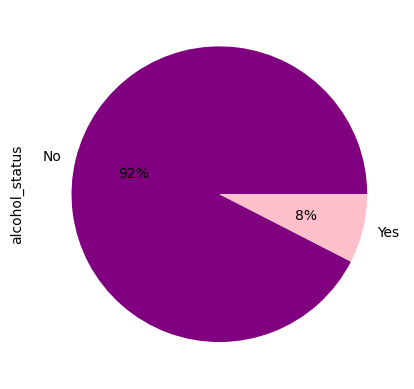

In [74]:
# Creating alcohol_status visualisation
pie_alcohol = df_active['alcohol_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['purple','pink'])

In [75]:
# Exporting Alcohol_status visualisation
pie_alcohol.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pie_alcoholstatus.png'))

# 06 Comparing customer profiles with regions and departments

In [79]:
# Creating crosstab for region and age group
age_region = pd.crosstab(df_active['region'], df_active['age_group'], dropna = False, normalize = True)

In [80]:
# Checking crosstab 
age_region

age_group,Adult,Senior,Young adult
region,,,
Midwest,0.143899,0.061406,0.029027
Northeast,0.106602,0.047970,0.021898
South,0.203084,0.087545,0.042473
West,0.156848,0.067889,0.031359


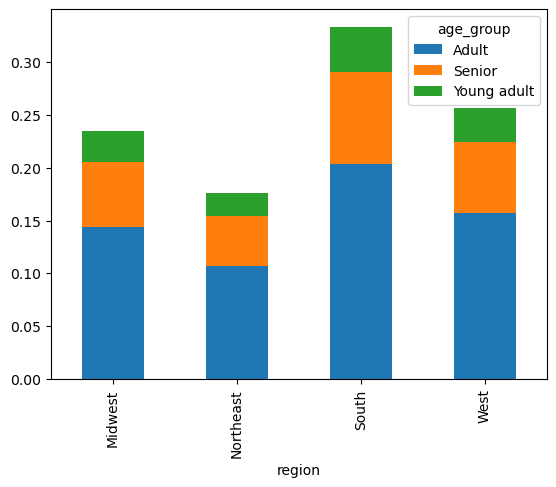

In [81]:
# Age region bar chart
bar_age_region = age_region.plot(kind='bar', stacked =True)

In [82]:
# Exporting age/ region bar chart
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_age_region.png'))

In [83]:
# Creating crosstab for region and income
region_income = pd.crosstab(df_active['region'], df_active['income_group'], dropna = False)

In [84]:
# Checking crosstab
region_income

income_group,High income,Low income,Middle income
region,,,
Midwest,893309,360797,5815482
Northeast,662099,272252,4390000
South,1261430,533978,8254594
West,985045,388710,6353037


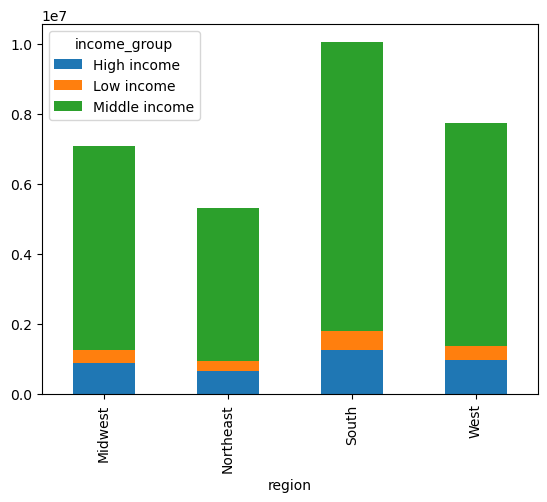

In [85]:
# Income/ region bar chart
bar_region_income = region_income.plot(kind='bar', stacked =True)

In [86]:
# Exporting region/ income bar chart
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_region_income.png'))

In [87]:
# Creating crosstab for region and department
region_dept = pd.crosstab(df_active['department'], df_active['region'], dropna = False)

In [88]:
# Checking Crosstab
region_dept

region,Midwest,Northeast,South,West
department,,,,
alcohol,32883,24114,47069,35507
babies,94027,71370,136961,100708
bakery,255082,194076,362204,281126
beverages,583228,451674,837788,634551
breakfast,151846,114701,217548,169324
bulk,7806,5482,10953,8600
canned goods,230173,171517,327746,252605
dairy eggs,1182974,892624,1682429,1295413
deli,228200,173837,325082,250931


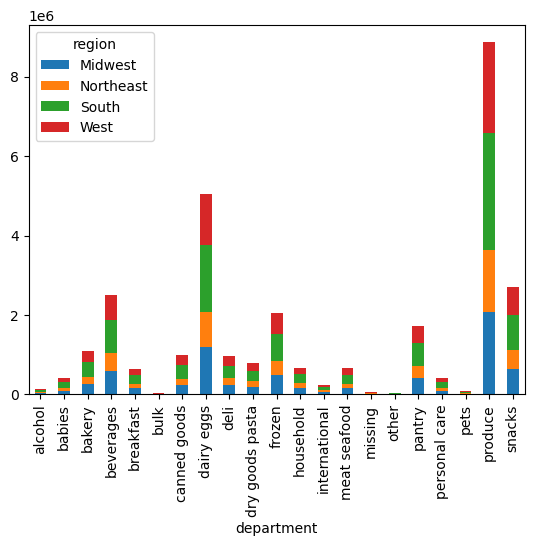

In [89]:
# Region Department Bar Chart
bar_region_dept = region_dept.plot(kind='bar', stacked =True)

In [90]:
# Exporting region/ department bar chart
bar_region_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_region_department.png'))

In [91]:
# Creating crosstab for region and price range
region_pr = pd.crosstab(df_active['region'], df_active['price_range_loc'], dropna = False)

In [92]:
# Checiking crosstab
region_pr

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,90599,2158175,4772198
Northeast,67799,1631466,3588112
South,128845,3065459,6785196
West,99478,2361905,5211900


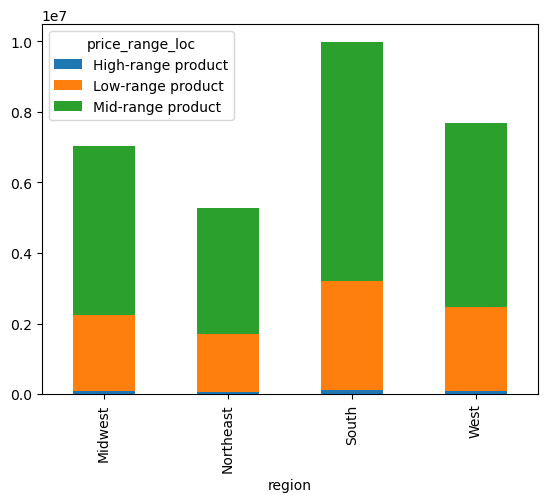

In [93]:
# Region/ price range bar chart
bar_region_pr = region_pr.plot(kind='bar', stacked =True)

In [94]:
# Exporting region/ price range bar chart
bar_region_pr.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_region_pricerange.png'))

In [96]:
# Creating crosstab for income and frequency
income_freq = pd.crosstab(df_active['income_group'], df_active['frequency_flag'], dropna = False)

In [97]:
# Checking crosstab
income_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High income,2578783,382996,840104
Low income,982997,192453,380287
Middle income,16613318,2610312,5589483


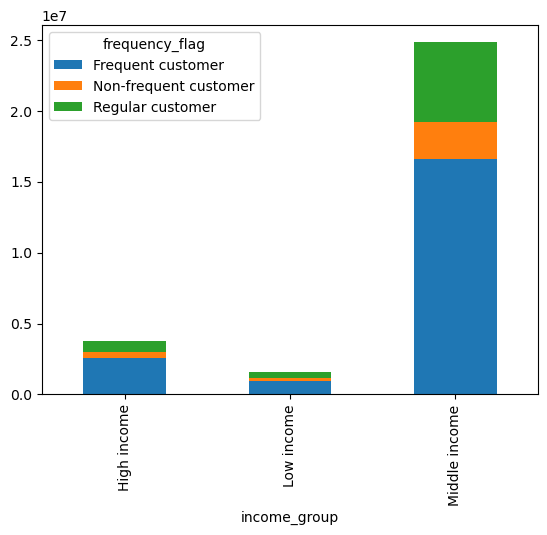

In [98]:
# Income group and order frequency bar chart
bar_income_freq = income_freq.plot(kind='bar', stacked =True)

In [99]:
# Exporting income group/ order frequency bar chart
bar_income_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_income_order_frequency.png'))

In [102]:
# Creating crosstab for age and frequency
age_freq = pd.crosstab(df_active['age_group'], df_active['frequency_flag'], dropna = False)

In [103]:
# Checking crosstab
age_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,12285728,1950914,4180962
Senior,5364670,838053,1787002
Young adult,2525234,396794,842067


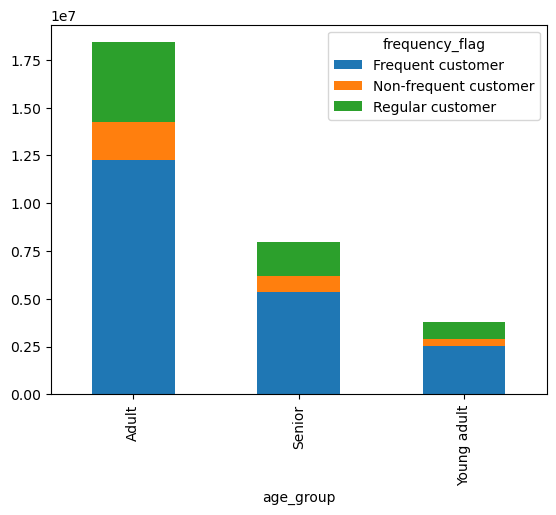

In [104]:
# Age/ order frequency bar chart
bar_age_freq = age_freq.plot(kind='bar', stacked =True)

In [105]:
# Exporting age/ order frequency bar chart
bar_age_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_age_order_freq.png'))

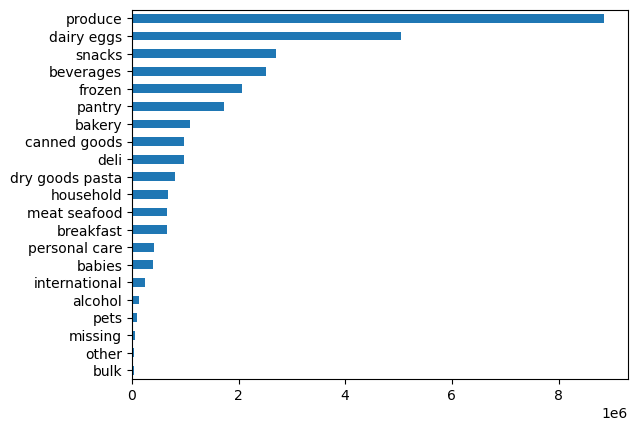

In [107]:
# Creating department categories bar chart
bar_dept = df_active.department.value_counts().sort_values().plot(kind = 'barh')

In [108]:
# Creating department/ order frequency crosstab
dept_freq = pd.crosstab(df_active['department'], df_active['frequency_flag'], dropna = False)

In [109]:
# Checking department/ order frequency crosstab
dept_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,94905,14552,30116
babies,303918,28707,70441
bakery,733011,113308,246169
beverages,1672485,268466,566290
breakfast,434045,69718,149656
bulk,24209,2757,5875
canned goods,622852,118080,241109
dairy eggs,3459339,499664,1094437
deli,641495,108177,228378


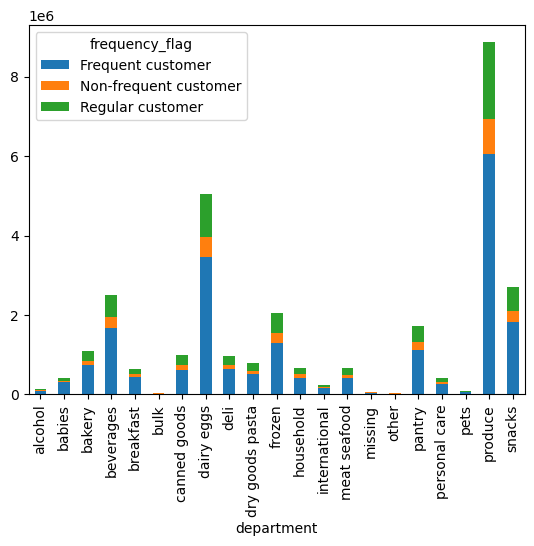

In [110]:
# Department/ order frequency bar chart
bar_dept_freq = dept_freq.plot(kind='bar', stacked =True)

In [111]:
# Exporting department/ order frequency bar chart 
bar_dept_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_dept_order_freq.png'))

# 07 Eporting Final Dataframe

In [112]:
df_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_instacart_dataframe.pkl'))